## Artifical Neuron
Artifical Neurons act as computational units and transform inputs into outputs using an activation function.

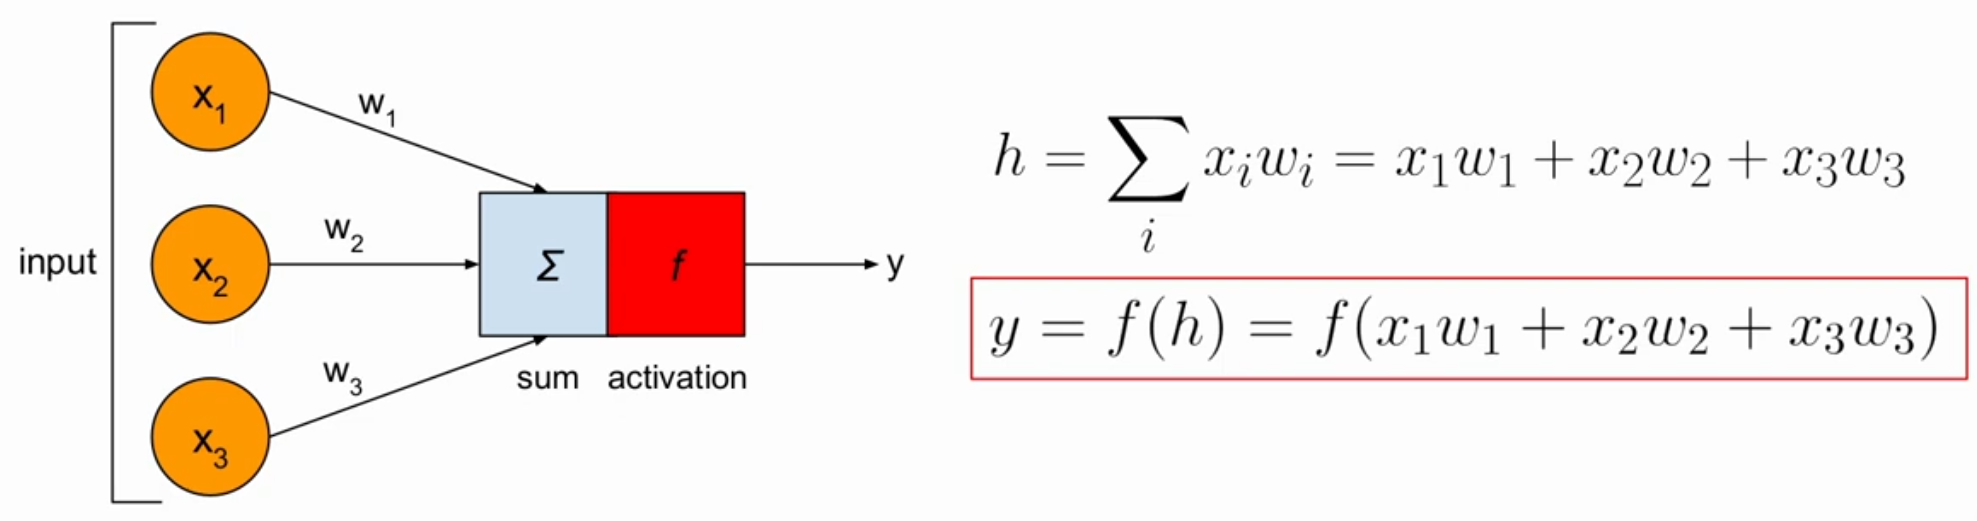

In [6]:
import math

In [7]:
inputs  = [.5, .3, .2]
weights = [.4, .7, .2]

In [8]:
def sigmoid(x):
    y = 1.0 / (1 + math.exp(-x))
    return y

def activate(inputs, weights):
    # Perform net input
    h = 0
    for x, w in zip(inputs, weights):
        h = x*w

    # perform activation
    return sigmoid(h)

In [9]:
output  = activate(inputs, weights)
print(output)

0.5099986668799655


## Vector and Matrix Operations

### Addition

\begin{equation}
\textbf{a + b} = 
\begin{pmatrix}
  a_{1} & + & b_{1}\\
  a_{2} & + & b_{2}\\
  a_{3} & + & b_{3}\\
\end{pmatrix}
\end{equation}

### Dot product

\begin{equation}
\textbf{a $\cdot$ b} = 
\begin{pmatrix}
  a_{1} \\
  a_{2} \\
  a_{3} \\
\end{pmatrix}
\cdot
\begin{pmatrix}
  b_{1} \\
  b_{2} \\
  b_{3} \\
\end{pmatrix}
= a_{1} b_{1} + a_{2} b_{2} + a_{3} b_{3}
\end{equation}

## Computation in Neural Networks

### Why do you need a neural network?
- A single neuron works for linear problems
- Real-world problems are complex
- ANNs can reporoduce highly non-linear functions

### Components of a artificial neural network
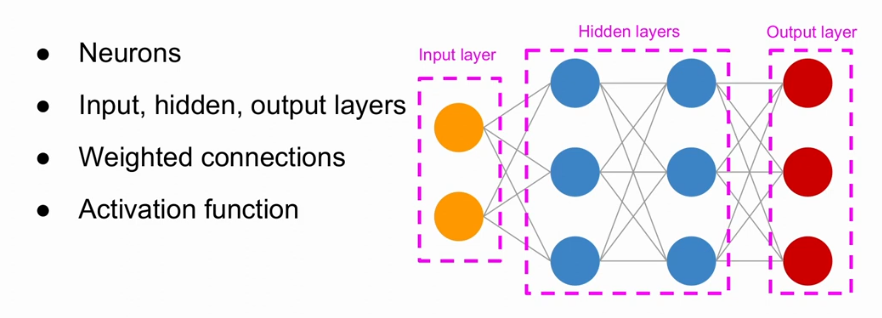

### Multilayer perceptron

- One of the firs topologys
- Left to right information processing


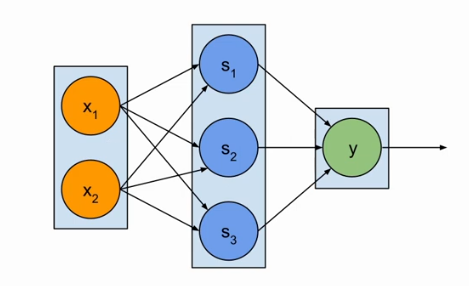

#### Computation
- Weights
- Net inputs (sum of weighted inputs)
- Activationa (output of neurons to next layer)

### Weights
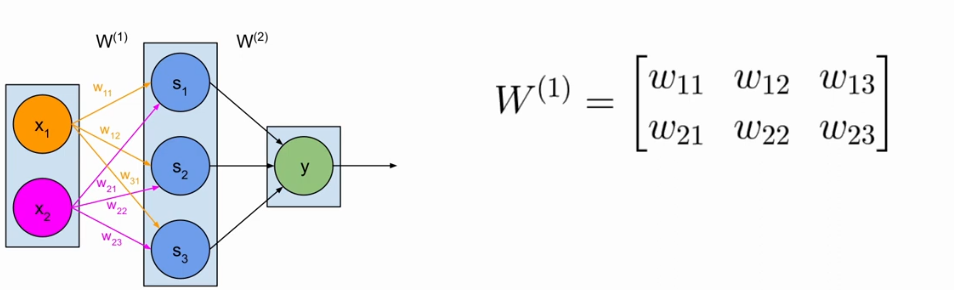

#### Net inputs (1st Layer)
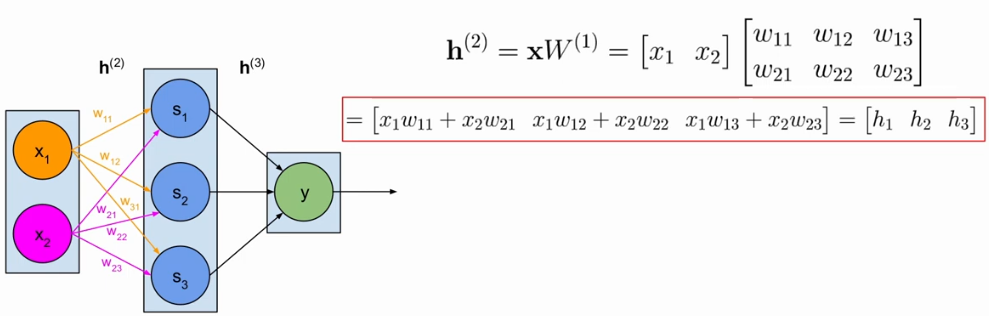

#### Activation (2nd Layer)
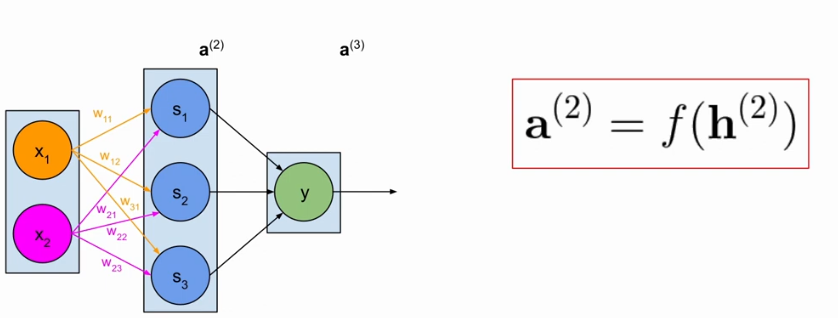

#### Output (3rd layer)
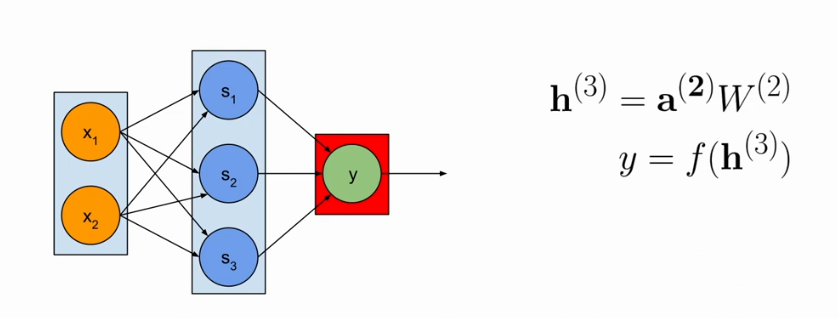

#### Example
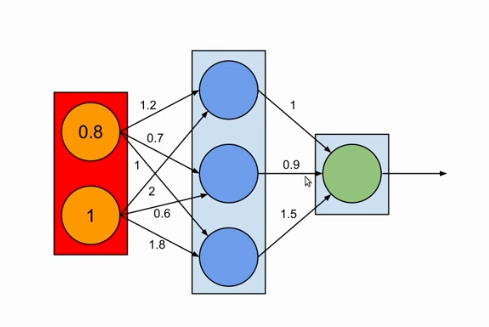
##### Net inputs
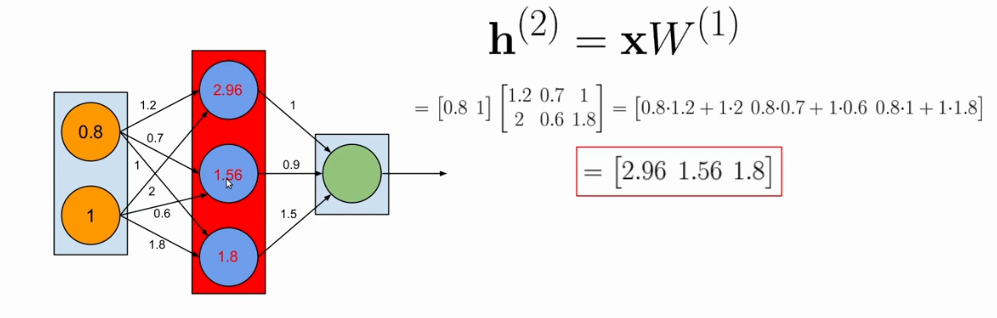
##### Activation
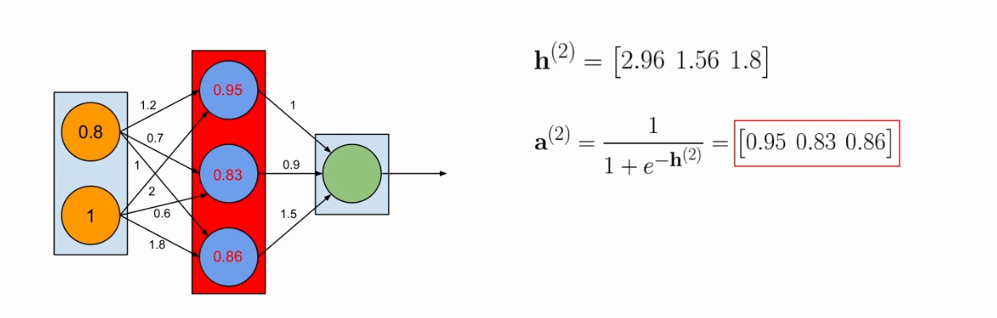
##### Output
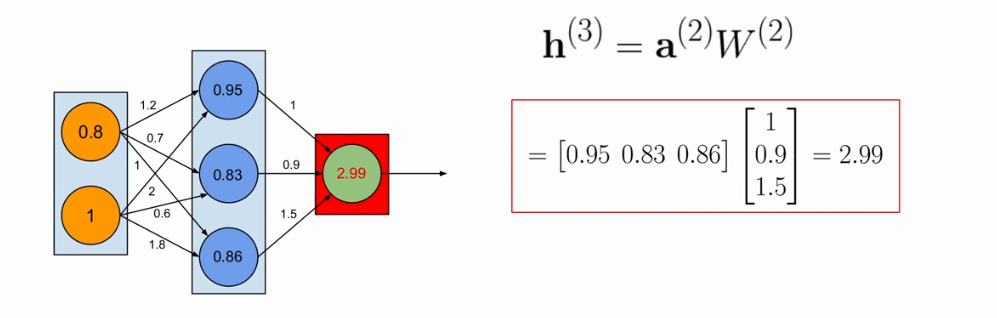
##### Output activation 
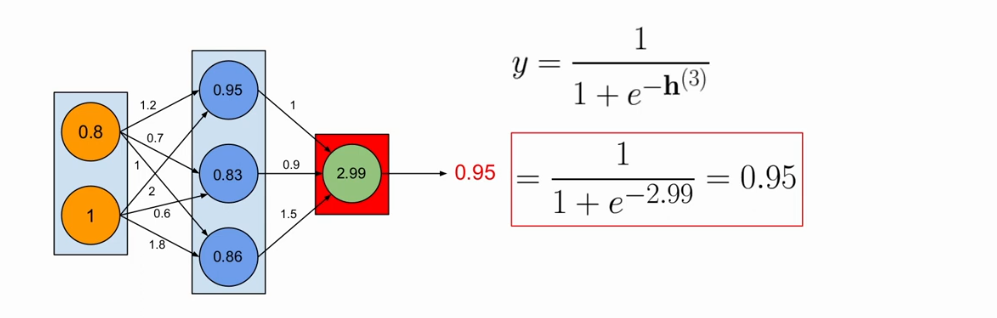

## Multilayer perceptron Implemenation 

In [12]:
import numpy as np

In [27]:
class MLP:
    def __init__(self, num_inputs=3, num_hidden=[3, 5], num_outputs=2):
        # number of hidden layers says: 1st layer: 3 neurons
        #                               2nd layer: 5 neurons
        self.num_inputs  = num_inputs
        self.num_hidden  = num_hidden
        self.num_outputs = num_outputs

        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]

        #initate random wights
        self.weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i+1])
            self.weights.append(w)
            print(w)
            print("\n")

    def forward_propagate(self, inputs):
        activations = inputs
        
        for w in self.weights:
            # calculate net inputs
            net_inputs = np.dot(activations, w)
            # calculate the activations
            activations = self.__sigmoid(net_inputs)

        return activations 
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    


In [28]:
mlp = MLP()
inputs = np.random.rand(mlp.num_inputs)
outputs = mlp.forward_propagate(inputs)

print("The network inputs is: {}".format(inputs))
print("The network outputs is: {}".format(outputs))

[[0.56633859 0.69656827 0.26168665]
 [0.75466649 0.85065505 0.95656931]
 [0.81315215 0.58211432 0.52820407]]


[[0.95979845 0.70083594 0.23946114 0.9867249  0.83668376]
 [0.95338971 0.75770332 0.28605444 0.26123614 0.5434651 ]
 [0.84828573 0.4074428  0.28341217 0.49973727 0.01083027]]


[[0.58315103 0.97199772]
 [0.22555545 0.60515861]
 [0.15274756 0.97893856]
 [0.97617503 0.54049392]
 [0.80341717 0.04170903]]


The network inputs is: [0.81468389 0.04168669 0.57703424]
The network outputs is: [0.89328905 0.91643885]


# Training a neural network
## Goals
- Tweak weights of the connections
- Feed training data (input + target) to the network and calculate the error to make these tweaks
- This is a iterative process

## Taining overview
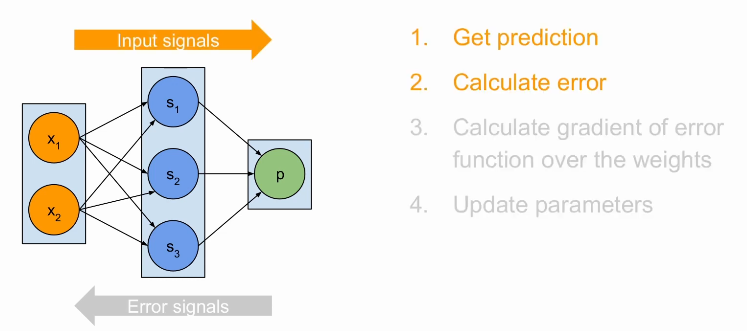

The graident is used to determine how the weights should be alterd for the model.

### Get prediction
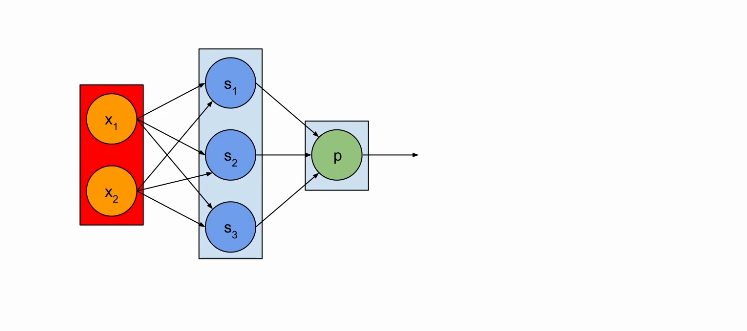

### Calculate the error
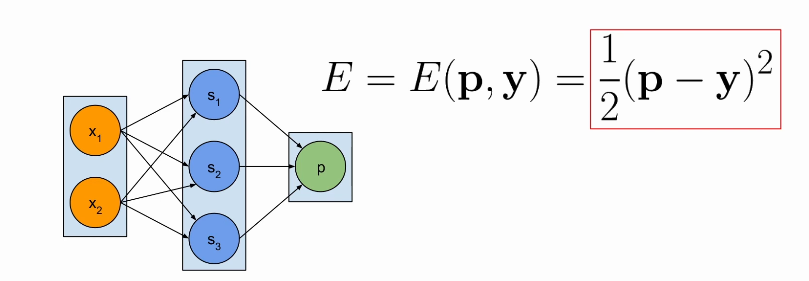

### Calculate gradient of error function (Backpropagation)
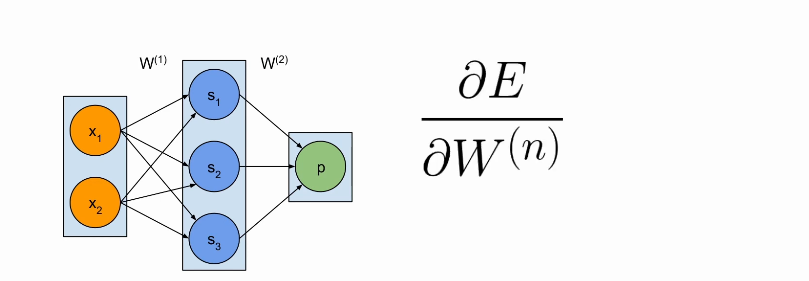
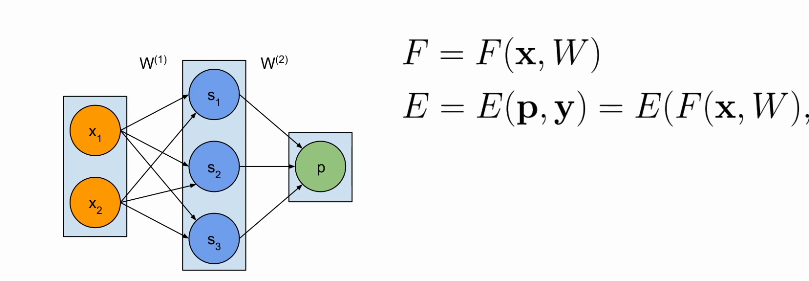
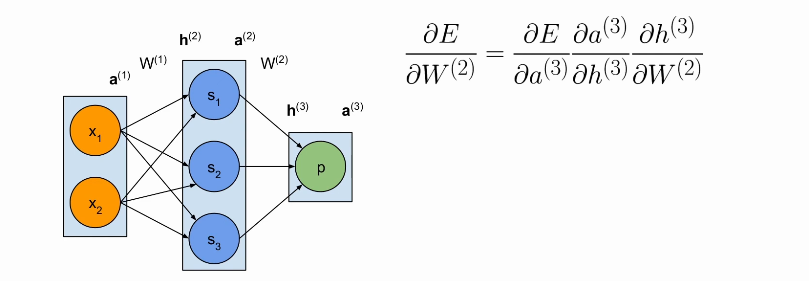
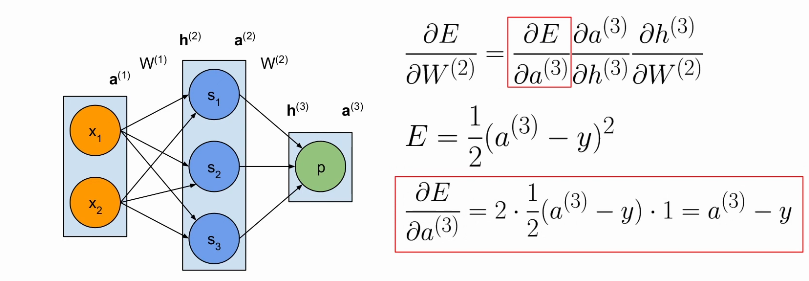
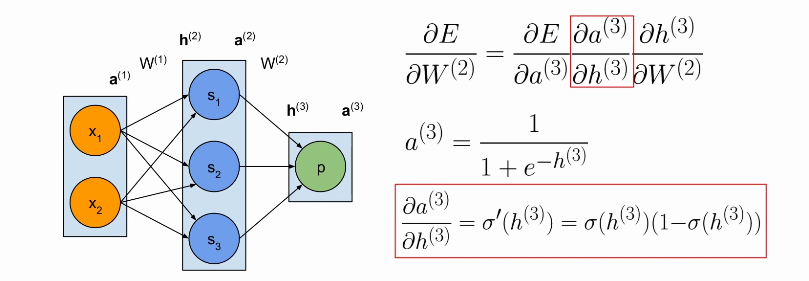
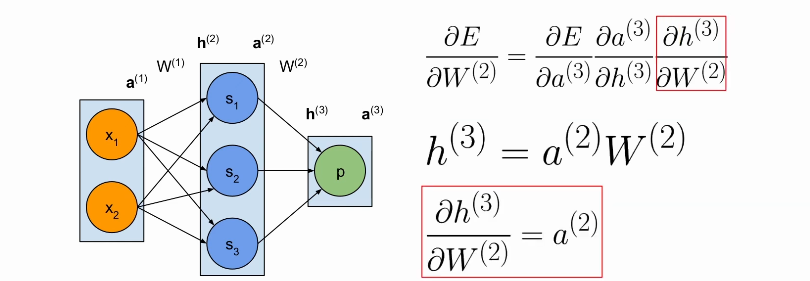
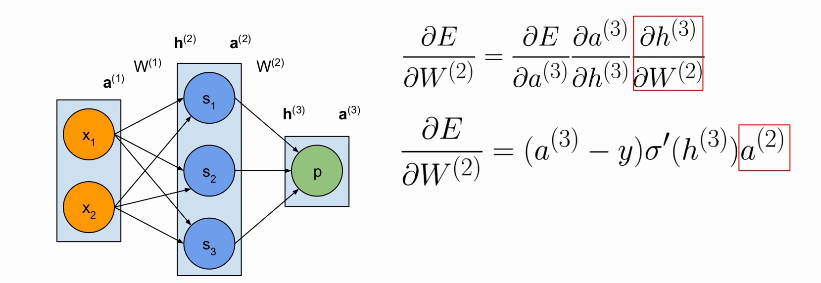
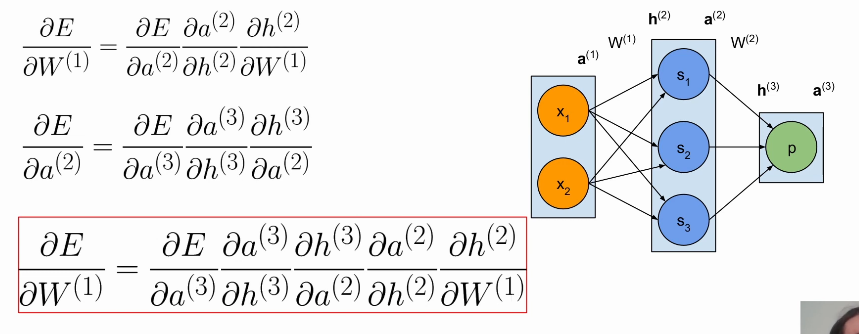
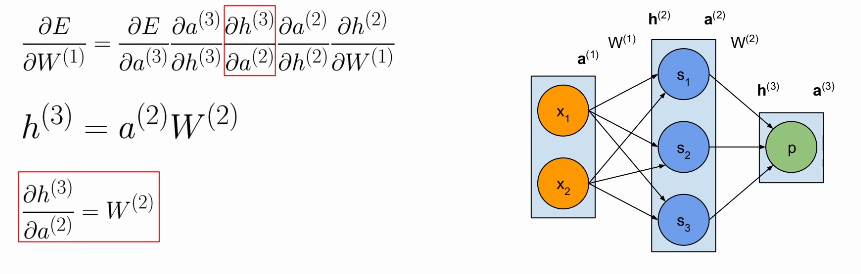
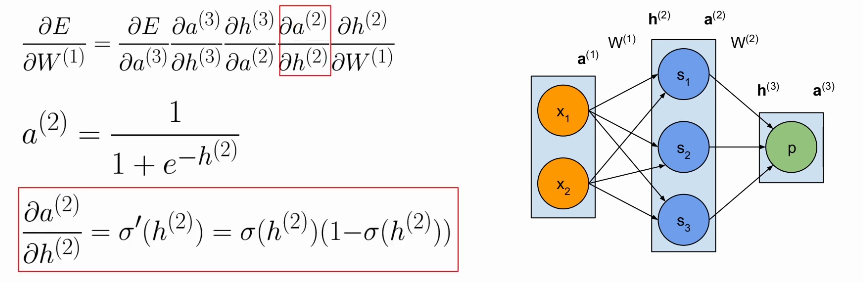
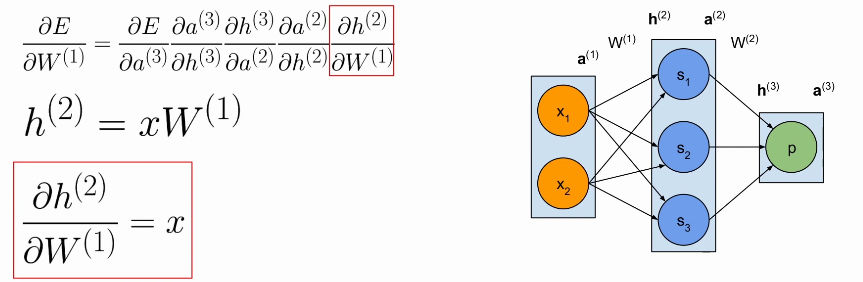
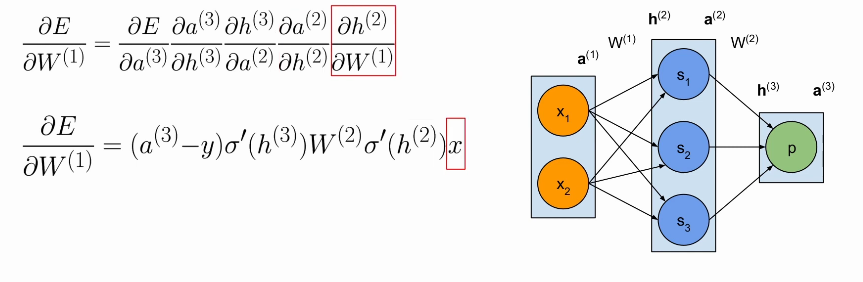
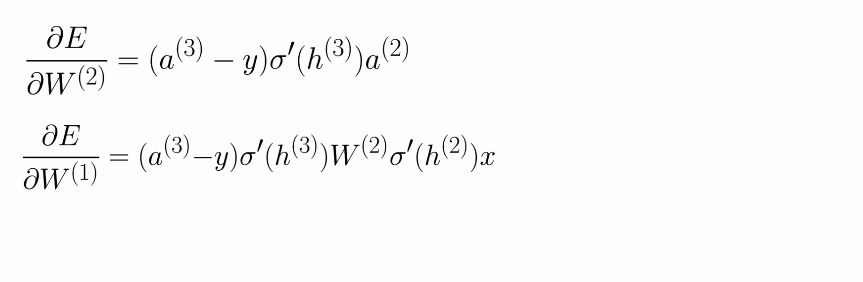
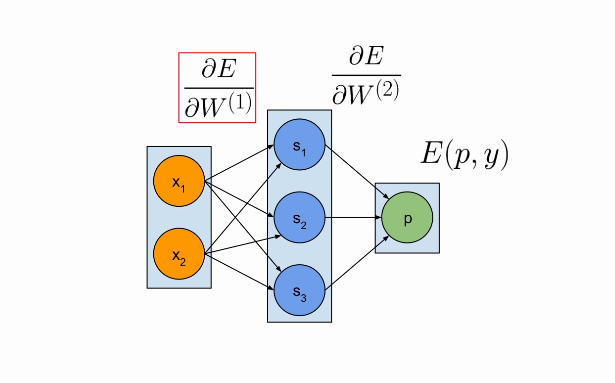

### Update parameters/weights (gradient desent)
- The goal is to tweak the weights in such a way that we can minimum possible error. 
- Take a step in opposite direction to gradient torwards minimum error to minimize
- Step = Learning Rate
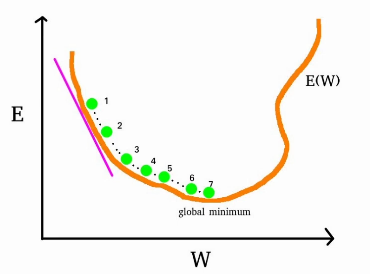





# Training a nerual network
- Save activations and derivatives
- Implement backpropagation
- Implement gradient descent
- Implement train
- Train our net with some dummy dataset
- Make new predidcitons


In [49]:
import numpy as np

class MLP:
    def __init__(self, num_inputs=3, num_hidden=[3, 5], num_outputs=2):
        # number of hidden layers says: 1st layer: 3 neurons
        #                               2nd layer: 5 neurons
        self.num_inputs  = num_inputs
        self.num_hidden  = num_hidden
        self.num_outputs = num_outputs

        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]

        #initate random wights
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)

        self.weights = weights

        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations

        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i+1]))
            derivatives.append(d)
        self.derivatives = derivatives

    def forward_propagate(self, inputs):
        activations = inputs
        self.activations[0] = inputs

        for i, w in enumerate(self.weights):
            # calculate net inputs
            net_inputs = np.dot(activations, w)
            # calculate the activations
            activations = self.__sigmoid(net_inputs)
            self.activations[i+1] = activations

        # a_3 = s(h_3)
        # h_3 = a_2*w_2

        return activations 
    
    def back_propagate(self, error, verbose =False):
        # dE/dW_i = (y- a[i + 1])s'(h_[i+1]) * a_i
        # s'(h_[i+1]) = s(h_[i+1])(1 - s(h_[i+1]))
        # s(h_[i+1]) = a_[i+1]

        # dE/dW_[i-1] = (y- a[i + 1])s'(h_[i+1]) W_i s`(h_i)a_[i+1]

        for i in reversed(range(len(self.derivatives))):
            activations = self.activations[i+1]
            delta = error * self.__sigmoid_derivative(activations) #ndarray([0.1,0.2]) --> ndarray([[0.1, 0.2]])
            delta_reshaped = delta.reshape(delta.shape[0], -1).T
            current_activations = self.activations[i] # ndarray([0.1, 0.2]) --> ndarray([[0.1], [0.2]])
            current_activations_reshaped = current_activations.reshape(current_activations.shape[0], -1)
            self.derivatives[i] = np.dot(current_activations_reshaped, delta_reshaped)
            error = np.dot(delta, self.weights[i].T)
    
            if(verbose):
                print("Derivatives for W{}: {}".format(i, self.derivatives[i]))

        return error

    def __sigmoid_derivative(self, x):
        return x * (1.0 - x)
             


    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [50]:
# Create an mlp
mlp = MLP(2, [5], 1)

# Create dummy data
input = np.array([0.1, 0.2])
target = np.array([0.3])

# Forward propagation
output = mlp.forward_propagate(input)

# Calculate error
error = target - output

# Back propagation 
mlp.back_propagate(error, verbose=True)

Derivatives for W1: [[-0.04325054]
 [-0.04293148]
 [-0.04203732]
 [-0.04422389]
 [-0.04252899]]
Derivatives for W0: [[-0.00121076 -0.00126927 -0.00085762 -0.00035057 -0.00147128]
 [-0.00242152 -0.00253855 -0.00171524 -0.00070115 -0.00294255]]
